In [3]:
pip install transformers torch pillow

In [3]:
# Step 1: Import libraries
from transformers import AutoImageProcessor, AutoModelForImageClassification
from PIL import Image
import torch
import matplotlib.pyplot as plt
import os

# Suppress symlink warning
os.environ["HF_HUB_DISABLE_SYMLINKS_WARNING"] = "1"

In [4]:
# Step 2: Load model and processor
model_name = "LukeJacob2023/nsfw-image-detector"
processor = AutoImageProcessor.from_pretrained(model_name, use_fast=True)
model = AutoModelForImageClassification.from_pretrained(model_name)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Inspect label mappings
labels = model.config.id2label
print("Label mappings:", labels)

Using `use_fast=True` but `torchvision` is not available. Falling back to the slow image processor.
C:\Users\User\anaconda3\Lib\site-packages\transformers\models\vit\feature_extraction_vit.py:30: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


Label mappings: {0: 'drawings', 1: 'hentai', 2: 'neutral', 3: 'porn', 4: 'sexy'}


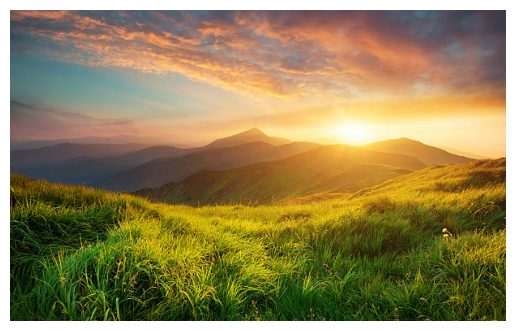

In [47]:
# Step 3: Load and display image
image_path = "C:/Users/User/Downloads/image1.jpg"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
plt.imshow(image)
plt.axis("off")
plt.show()

In [48]:
# Step 4: Preprocess image
inputs = processor(images=image, return_tensors="pt")
inputs = {k: v.to(device) for k, v in inputs.items()}

In [49]:
# Step 5: Run inference
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=-1)
    predicted_class_idx = torch.argmax(probabilities, dim=-1).item()

In [50]:
predicted_label = labels[predicted_class_idx]
print(f"Predicted class: {predicted_label}")
print(f"Probabilities: {probabilities[0].tolist()}")

Predicted class: neutral
Probabilities: [4.351597453933209e-05, 4.1033996240003034e-05, 0.9998233914375305, 4.4649837946053594e-05, 4.74686203233432e-05]
